In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dhirajk100/DT-Classification/master/Decision-Tree-Classification-Data.csv')
data.head()

,age,bp,diabetes
0,65,65,1
1,45,82,0
2,35,73,1
3,45,90,0
4,50,68,1


In [3]:
data.shape

(987, 3)

In [4]:
fn = ['age','bp']
cn = ['diabetes']

In [5]:
data.isnull().sum()

age         0
bp          0
diabetes    0
dtype: int64

C:\Users\HP i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

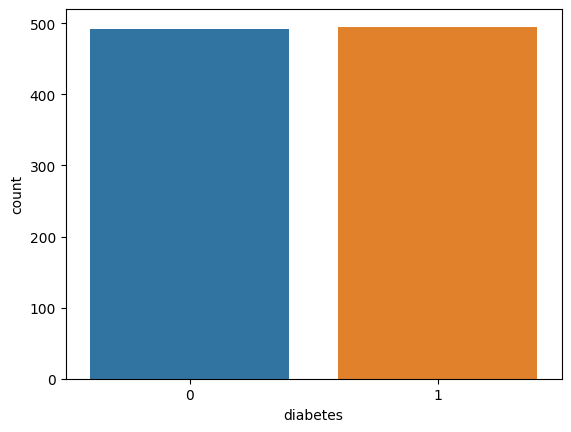

In [6]:
sns.countplot(data['diabetes'])

In [7]:
x = data.iloc[:,0:2].values
y = data['diabetes'].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=5,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [21]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1], dtype=int64)

In [22]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
0         0          1
1         1          1
2         1          1
3         0          1
4         1          1
..      ...        ...
242       1          1
243       0          0
244       0          0
245       0          0
246       1          1

[247 rows x 2 columns]


In [23]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[114,   7],
       [  7, 119]], dtype=int64)

In [24]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 79.00
|   |--- feature_1 <= 77.50
|   |   |--- class: 1
|   |--- feature_1 >  77.50
|   |   |--- class: 1
|--- feature_1 >  79.00
|   |--- feature_0 <= 37.50
|   |   |--- class: 1
|   |--- feature_0 >  37.50
|   |   |--- class: 0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

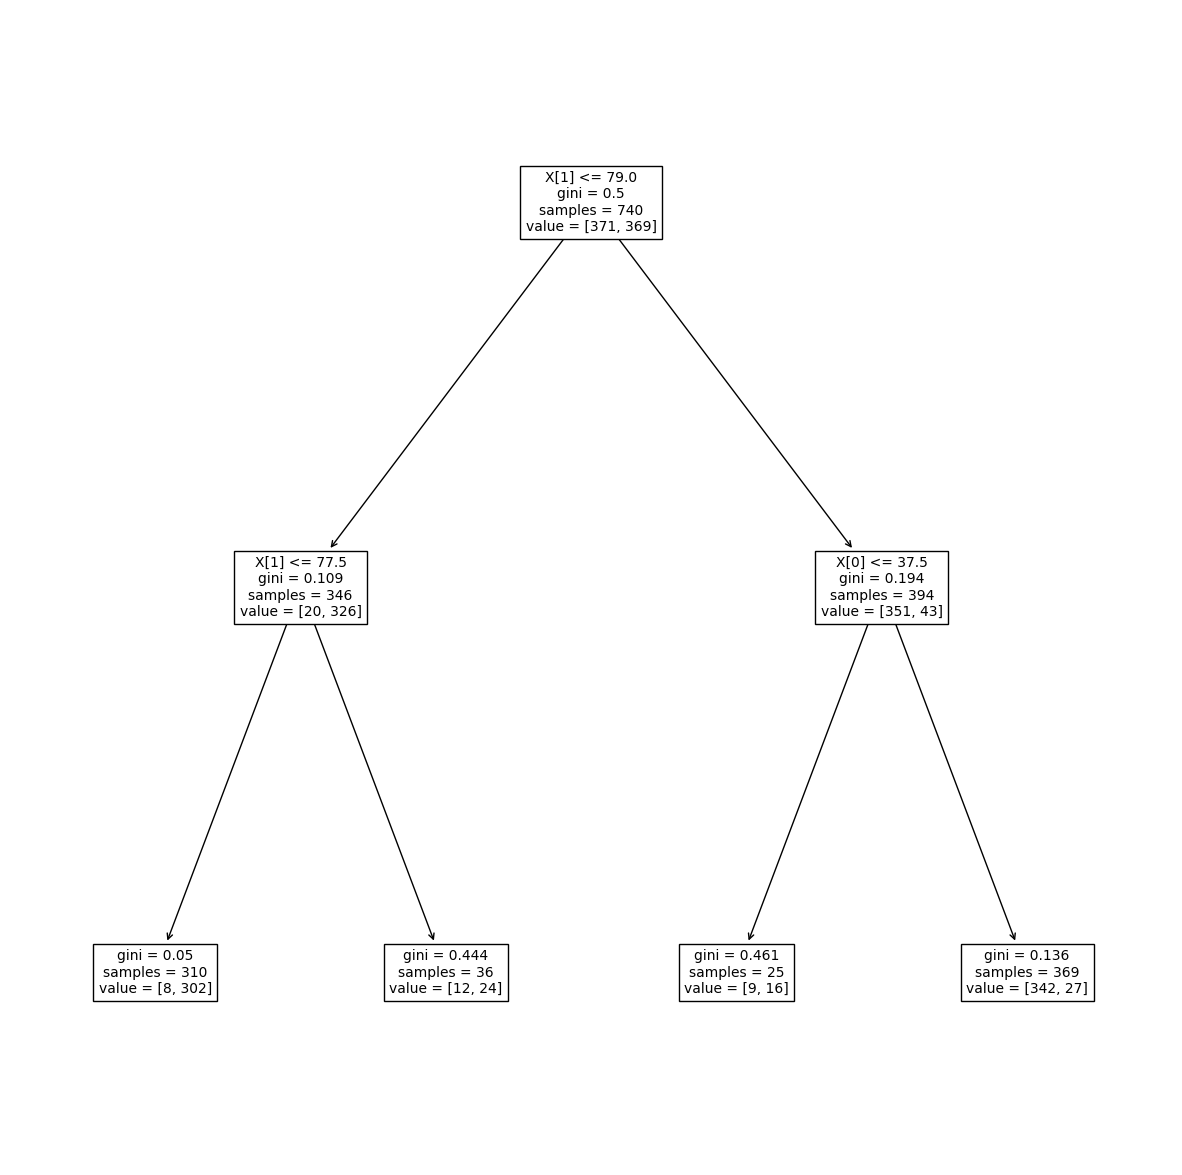

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       121
           1       0.94      0.94      0.94       126

    accuracy                           0.94       247
   macro avg       0.94      0.94      0.94       247
weighted avg       0.94      0.94      0.94       247



In [27]:
#accuracy
Acc = metrics.accuracy_score(y_test, y_pred)*100
print(Acc)

<IPython.core.display.Javascript object>

94.33198380566802


In [28]:
y_pred2 = clf.predict(x_train)

In [29]:
Acc2 = metrics.accuracy_score(y_train, y_pred2)*100
print(Acc2)

<IPython.core.display.Javascript object>

92.43243243243244


In [30]:
data_frame = pd.DataFrame({"Testing_Acc":Acc,"Training_Acc":Acc2},index=[1])
data_frame

,Testing_Acc,Training_Acc
1,94.331984,92.432432
